# USING DENTAL METRICS TO PREDICT GENDER!

The goal of this project is to analyse the data and predict, based on a combination of dental features that  describes the Gender of the person


### Data Collection and Preprocessing

The initial phase of this project involves gathering an extensive dataset of dental records. These records encompass measurements such as teeth dimensions, morphology, dental arch form, and other pertinent features. Additionally, the dataset includes the gender of individuals, which serves as the target variable for the predictive model.

Ensuring the dataset's quality and reliability involves thorough data preprocessing, which includes:

1. **Data Cleaning**: Addressing missing values, correcting inconsistencies, and removing outliers that could potentially skew the analysis.
2. **Feature Engineering**: Enhancing the model's predictive power by creating new features from existing data, such as calculating ratios or differences between specific measurements.
3. **Normalization and Scaling**: Standardizing the data so that features with varying scales do not disproportionately affect the model.

### Exploratory Data Analysis (EDA)
EDA involves a thorough examination of the dataset to uncover patterns, trends, and relationships between dental features and gender. Visualizations such as histograms, scatter plots, and box plots help in understanding the distribution of features and identifying any significant differences between genders. Statistical tests are also conducted to quantify these differences.

### Model Development

The central aspect of this project is to develop a machine learning model that predicts gender based on dental features. Various algorithms are considered for this task, including:

- Logistic Regression
- Decision Trees
- Random Forests
- XGBoost Classifier

To evaluate the performance of these models, the dataset is divided into training and testing sets. Cross-validation is utilized to ensure that the model generalizes effectively to unseen data.

### Conclusion and Future Work

This project establishes a methodology for predicting gender from dental features, aiding forensic science and archaeology. Future work includes expanding the dataset, exploring additional features, and refining the model to enhance accuracy, fostering new insights into the relationship between biology and gender through advanced data science.

In [59]:
# Importing the necessary packages 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as  sns

In [60]:
# Import the dataset using pandas 

data = pd.read_csv('Dentistry Dataset.csv')
data.head()

#  here data related to classification problem ....

,Sl No,Sample ID,Age,Gender,inter canine distance intraoral,intercanine distance casts,right canine width intraoral,right canine width casts,left canine width intraoral,left canine width casts,right canine index intra oral,right canine index casts,left canine index intraoral,left canine index casts
0,1,NaN,24,Female,25.06,25.05,6.08,6.08,6.09,6.10,0.242,0.242,0.242,0.241
1,2,NaN,22,Female,25.78,25.79,6.13,6.13,6.33,6.33,0.237,0.237,0.247,0.247
2,3,NaN,23,Female,23.83,23.83,5.91,5.96,6.28,6.28,0.248,0.248,0.264,0.264
3,4,NaN,20,Female,26.12,26.12,6.08,6.08,6.56,6.56,0.232,0.232,0.250,0.250
4,5,NaN,20,Female,26.36,26.41,6.09,6.09,6.50,6.50,0.231,0.231,0.246,0.246


In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Sl No                            1100 non-null   int64  
 1   Sample ID                        0 non-null      float64
 2   Age                              1100 non-null   int64  
 3   Gender                           1100 non-null   object 
 4   inter canine distance intraoral  1100 non-null   float64
 5   intercanine distance casts       1100 non-null   float64
 6   right canine width intraoral     1100 non-null   float64
 7   right canine width casts         1100 non-null   float64
 8   left canine width intraoral      1100 non-null   float64
 9   left canine width casts          1100 non-null   float64
 10  right canine index intra oral    1100 non-null   float64
 11  right canine index casts         1100 non-null   float64
 12  left canine index in

In [62]:
# here sample id is a unnecessary column in the given data

data = data.drop(columns=['Sample ID'])

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Sl No                            1100 non-null   int64  
 1   Age                              1100 non-null   int64  
 2   Gender                           1100 non-null   object 
 3   inter canine distance intraoral  1100 non-null   float64
 4   intercanine distance casts       1100 non-null   float64
 5   right canine width intraoral     1100 non-null   float64
 6   right canine width casts         1100 non-null   float64
 7   left canine width intraoral      1100 non-null   float64
 8   left canine width casts          1100 non-null   float64
 9   right canine index intra oral    1100 non-null   float64
 10  right canine index casts         1100 non-null   float64
 11  left canine index intraoral      1100 non-null   float64
 12  left canine index ca

In [64]:
data.describe()

,Sl No,Age,inter canine distance intraoral,intercanine distance casts,right canine width intraoral,right canine width casts,left canine width intraoral,left canine width casts,right canine index intra oral,right canine index casts,left canine index intraoral,left canine index casts
count,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000
mean,550.500000,21.625455,25.989009,25.880082,6.563000,6.564491,6.669627,6.675018,0.253122,0.252355,0.256453,0.256361
std,317.686953,2.085892,1.315292,1.862323,0.379035,0.377553,0.375841,0.377098,0.015344,0.012892,0.012355,0.012374
min,1.000000,18.000000,23.120000,6.540000,5.460000,5.460000,5.460000,5.460000,0.223000,0.223000,0.223000,0.223000
25%,275.750000,20.000000,25.000000,24.980000,6.290000,6.300000,6.400000,6.407500,0.242000,0.242000,0.247000,0.247000
50%,550.500000,22.000000,25.900000,25.900000,6.520000,6.520000,6.660000,6.680000,0.253000,0.253000,0.255000,0.255000
75%,825.250000,23.000000,26.992500,27.000000,6.802500,6.802500,6.910000,6.920000,0.262000,0.261250,0.264250,0.264000
max,1100.000000,25.000000,30.310000,30.310000,7.610000,7.600000,7.810000,7.810000,0.363000,0.302000,0.305000,0.304000


In [65]:
# Extracting independent variable from dataset

x = data.iloc[:, 3:].values
x

array([[25.06 , 25.05 ,  6.08 , ...,  0.242,  0.242,  0.241],
       [25.78 , 25.79 ,  6.13 , ...,  0.237,  0.247,  0.247],
       [23.83 , 23.83 ,  5.91 , ...,  0.248,  0.264,  0.264],
       ...,
       [24.24 , 24.24 ,  6.6  , ...,  0.272,  0.272,  0.272],
       [24.87 , 24.87 ,  6.57 , ...,  0.264,  0.267,  0.267],
       [24.51 , 24.51 ,  6.36 , ...,  0.259,  0.276,  0.276]])

In [66]:
# Extracting dependent variable from dataset

y = data.iloc[:, 2].values
y

array(['Female', 'Female', 'Female', ..., 'Male', 'Male', 'Male'],
      dtype=object)

In [67]:
# Encoding categorical data using labelencoder

from sklearn.preprocessing import LabelEncoder  

lc = LabelEncoder()
y = lc.fit_transform(y)
y

array([0, 0, 0, ..., 1, 1, 1])

In [68]:
# Normalize the x variable      

from sklearn.preprocessing import Normalizer  

normalizer = Normalizer()
x = normalizer.fit_transform(x)
x

array([[0.66880888, 0.668542  , 0.16226488, ..., 0.00645857, 0.00645857,
        0.00643188],
       [0.66893188, 0.66919136, 0.15905944, ..., 0.00614961, 0.00640908,
        0.00640908],
       [0.66468714, 0.66468714, 0.16484687, ..., 0.00691743, 0.00736372,
        0.00736372],
       ...,
       [0.65974015, 0.65974015, 0.17963222, ..., 0.00740302, 0.00740302,
        0.00740302],
       [0.66176467, 0.66176467, 0.17482082, ..., 0.00702476, 0.00710459,
        0.00710459],
       [0.66108106, 0.66108106, 0.17154123, ..., 0.00698572, 0.00744424,
        0.00744424]])

In [69]:
# check the correlation of the data using Heatmap to understand the relationship and collinearity issues

correlation_matrix = data.corr()

C:\Users\Cortex-22-09-2023\AppData\Local\Temp\ipykernel_13928\3263065770.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


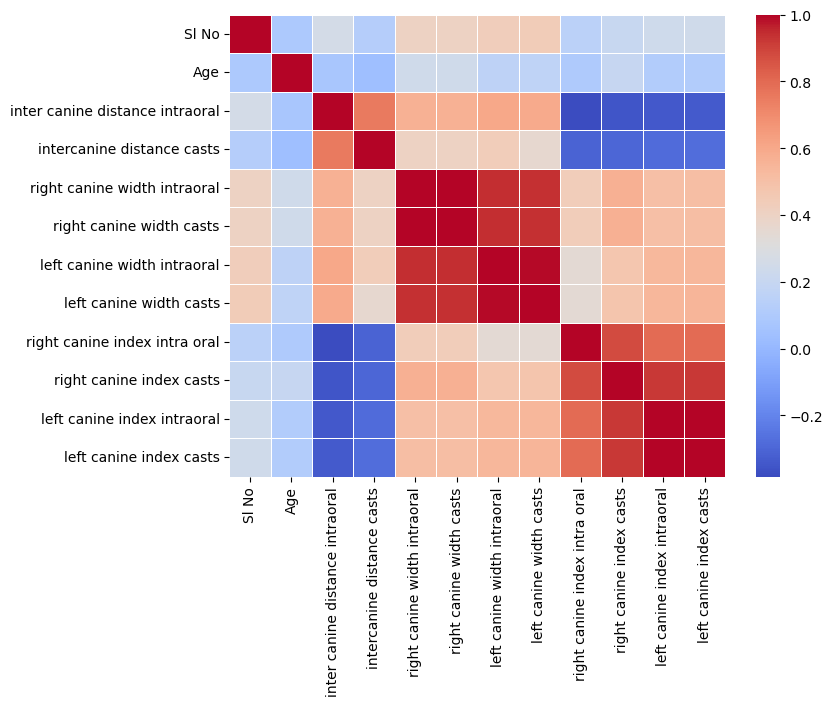

In [70]:
# visualize collinearity 

plt.figure(figsize = (8, 6))
sns.heatmap(correlation_matrix, cmap='coolwarm', linewidths=.5)
plt.show()

# which lie nearest to 1 has positively high correlation between between them where 0 respresnts no relation between them 
# A correlation coefficient of 1 indicates a perfect positive linear relationship.

In [71]:
#  Split the Data into Train and Test set

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,  test_size = 0.2, random_state=0)

In [72]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(880, 10)
(220, 10)
(880,)
(220,)


In [73]:
x_train

array([[0.66241455, 0.66241455, 0.1747474 , ..., 0.00668002, 0.00668002,
        0.00668002],
       [0.67013641, 0.66989148, 0.15455266, ..., 0.00563346, 0.00600086,
        0.00600086],
       [0.66894503, 0.66894503, 0.16074417, ..., 0.00620644, 0.00631031,
        0.00631031],
       ...,
       [0.66458066, 0.66458066, 0.17006511, ..., 0.00617541, 0.00619954,
        0.00619954],
       [0.67398538, 0.67398538, 0.15097052, ..., 0.00615474, 0.00618234,
        0.00618234],
       [0.66219176, 0.66244528, 0.17442111, ..., 0.00666755, 0.0066929 ,
        0.00671825]])

In [74]:
x_test

array([[0.66968636, 0.66942839, 0.16045644, ..., 0.00616545, 0.00616545,
        0.00616545],
       [0.66165615, 0.66165615, 0.17325417, ..., 0.00673481, 0.00694045,
        0.00694045],
       [0.66602474, 0.66602474, 0.16589528, ..., 0.00673356, 0.00689646,
        0.00689646],
       ...,
       [0.66356016, 0.66356016, 0.17261621, ..., 0.00689932, 0.00689932,
        0.00689932],
       [0.66460684, 0.66460684, 0.17059139, ..., 0.00688823, 0.00688823,
        0.00688823],
       [0.66906751, 0.66906751, 0.15751318, ..., 0.00569471, 0.0059855 ,
        0.0059855 ]])

In [75]:
# now , fit train datasets to some algorithms 
# logistic Regression

from sklearn.linear_model import LogisticRegression 
lclassification = LogisticRegression()
lclassification.fit(x_train, y_train)

LogisticRegression()

In [76]:
y_pred = lclassification.predict(x_test)
y_pred

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [77]:
from sklearn.metrics import confusion_matrix ,  accuracy_score
cm =  confusion_matrix(y_test, y_pred)
cm

array([[ 94,   4],
       [107,  15]], dtype=int64)

In [78]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.4954545454545455

In [79]:
print('Accuracy of Logistic Regression Classifier is: {:.2f}%'.format(accuracy*100))

Accuracy of Logistic Regression Classifier is: 49.55%


In [80]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier
dclassifier = DecisionTreeClassifier(criterion = 'entropy', random_state=0)
dclassifier.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [81]:
y_pred = dclassifier.predict(x_test)
y_pred

array([0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1])

In [82]:
from sklearn.metrics import confusion_matrix ,  accuracy_score
cm =  confusion_matrix(y_test, y_pred)
cm

array([[ 89,   9],
       [ 20, 102]], dtype=int64)

In [83]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8681818181818182

In [84]:
print('Accuracy of Decision Tree Classifier is: {:.2f}%'.format(accuracy*100))

Accuracy of Decision Tree Classifier is: 86.82%


In [85]:
# random forest classifier

from sklearn.ensemble import RandomForestClassifier
rclassifier = RandomForestClassifier(n_estimators = 10, criterion='entropy')
rclassifier.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [86]:
y_pred = rclassifier.predict(x_test)

In [87]:
cm =  confusion_matrix(y_test, y_pred)
cm

array([[ 89,   9],
       [ 21, 101]], dtype=int64)

In [88]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8636363636363636

In [89]:
print('Accuracy of Random Forest Classifier is: {:.2f}%'.format(accuracy*100))

Accuracy of Random Forest Classifier is: 86.36%


In [33]:
pip install xgboost scikit-learn


  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/a2/48/d5da8591891327b0faf08179d420fba3893c6134bdd449497c5329e4cb01/xgboost-2.1.0-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.1/124.9 MB 1.7 MB/s eta 0:01:12
   ---------------------------------------- 0.3/124.9 MB 2.8 MB/s eta 0:00:44
   ---------------------------------------- 0.6/124.9 MB 3.9 MB/s eta 0:00:32
   ---------------------------------------- 1.5/124.9 MB 7.4 MB/s eta 0:00:17
    --------------------------------------- 2.9/124.9 MB 10.8 MB/s eta 0:00:12
   - -------------------------------------- 3.9/124.9 MB 11.7 MB/s eta 0:00:11
   - -------------------------------------- 4.8/124.9 MB 13.4 MB/s eta 0:00:09
   - -------------------------------------- 5.8/124.9 MB 13.8 MB/s eta 0:00:09
   -- ------------------------------------- 6.5/124.9 MB 14.3 MB/s eta 0:00:09
   -- -----------

In [90]:
# xgBoost

from xgboost import XGBClassifier
gclassifier = XGBClassifier(random_state=0)
gclassifier.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=0, ...)

In [91]:
y_pred = gclassifier.predict(x_test)

In [92]:
cm =  confusion_matrix(y_test, y_pred)
cm

array([[ 87,  11],
       [ 17, 105]], dtype=int64)

In [93]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8727272727272727

In [94]:
print('Accuracy of xg Boosting Classifier is: {:.2f}%'.format(accuracy*100))

Accuracy of xg Boosting Classifier is: 87.27%
